# Krzywe ROC i Precision-Recall

# Import bibliotek

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score, auc, roc_curve, f1_score
import matplotlib.pyplot as plt
from statsmodels.discrete.discrete_model import Logit
from sklearn.linear_model import LogisticRegression

# Import danych

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/bartoszpankratz/223490-0286-SRD-Zaoczne/master/data_ROC_PR.csv")

#Podzial danych na zmienne zalezne i niezalezne
x = data.drop(columns = ['y'])
y = data["y"]

print('Liczba 0 w zbiorze y:', np.count_nonzero(y == 0))
print('Liczba 1 w zbiorze y:',np.count_nonzero(y == 1))

#Losowy podzial danych na zbiór treningowy (80%) i testowy (20%) 
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = .20)

Liczba 0 w zbiorze y: 986
Liczba 1 w zbiorze y: 14


Zbior jest bardzo niezbalansowany. Z tego powodu stworzone zostana 2 modele. Jeden z dodatkowym balansowaniem klas,
ktore automastucznie dopasuj wagi odwrotnie proporcjonalnie do częstotliwości klas w danych wejściowycha. Drugi natomiast
bez wprowadzania zadnych zmian

# Uczenie modelu bez zmian

In [3]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

# Uczenie modelu z dodatkowym balansowaniem klas

In [ ]:
model_balanced = LogisticRegression(class_weight = 'balanced')
model_balanced.fit(xtrain, ytrain)

cut_off = 0.5

In [4]:
def obliczenia(model, x, y):
    
    ypred = model.predict_proba(x)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y, ypred)
    fpr, tpr, thresholds = roc_curve(y, ypred)
    f1 = f1_score(y,ypred >= cut_off)
    return{
        'ROC AUC': auc(fpr, tpr),
        'PR AUC': auc(recall, precision),
        'fpr': fpr,
        'tpr': tpr,
        'precision': precision,
        'recall': recall,
        'F1 score': f1
    }

wyniki = obliczenia(model,xtest,ytest)
wyniki_balanced = obliczenia(model_balanced,xtest,ytest)

# PLOT ROC / RECALL

Obszar pod wykresem ROC: 0.7890451517394523


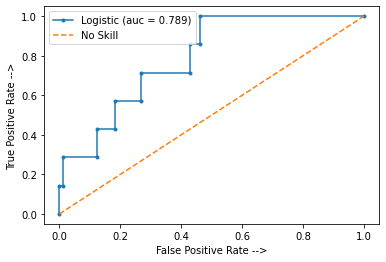

Obszar pod wykresem ROC balanced: 0.7579570688378978


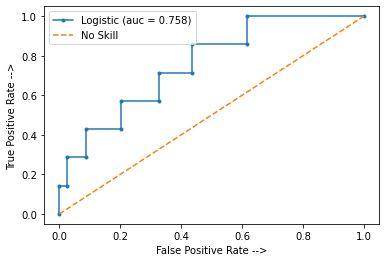

Obszar pod wykresem PR: 0.2587382382561165
F1 score: 0.0


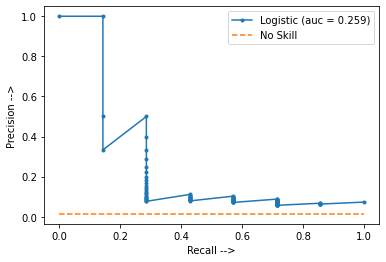

Obszar pod wykresem PR balanced: 0.23083777423738244
F1 score balanced: 0.19354838709677416


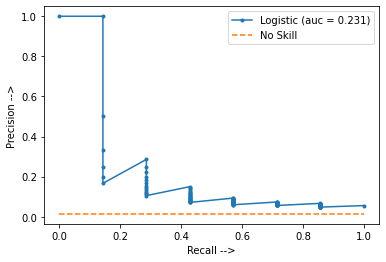

In [5]:
#PLOT ROC
print('Obszar pod wykresem ROC:',wyniki['ROC AUC'])

plt.plot(wyniki['fpr'],wyniki['tpr'], marker = '.', label='Logistic (auc = %0.3f)' % wyniki['ROC AUC'])
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()


print('Obszar pod wykresem ROC balanced:',wyniki_balanced['ROC AUC'])

plt.plot(wyniki_balanced['fpr'],wyniki_balanced['tpr'], marker = '.', label = 'Logistic (auc = %0.3f)' % wyniki_balanced['ROC AUC'])
plt.plot([0, 1], [0, 1], linestyle = '--', label = 'No Skill')
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.legend()
plt.show()

################################################################################################

#PLOT RECALL
print('Obszar pod wykresem PR:',wyniki['PR AUC'])
print("F1 score:",wyniki["F1 score"])
no_skill = len(y[y == 1]) / len(y)

plt.plot(wyniki['recall'],wyniki['precision'], marker = '.', label = 'Logistic (auc = %0.3f)' % wyniki['PR AUC'])
plt.plot([0, 1], [no_skill, no_skill], linestyle = '--', label = 'No Skill')
plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.legend()
plt.show()


print('Obszar pod wykresem PR balanced:',wyniki_balanced['PR AUC'])
print("F1 score balanced:",wyniki_balanced["F1 score"])
no_skill = len(y[y == 1]) / len(y)

plt.plot(wyniki_balanced['recall'],wyniki_balanced['precision'], marker = '.', label = 'Logistic (auc = %0.3f)' % wyniki_balanced['PR AUC'])
plt.plot([0, 1], [no_skill, no_skill], linestyle = '--', label = 'No Skill')
plt.xlabel('Recall -->')
plt.ylabel('Precision -->')
plt.legend()
plt.show()

Wyniki beda sie od siebie znaczaco roznic w zaleznosci od tego jakie dane wpadna to zbioru testowego.  
Jednak niezaleznie od danych mozemy zaobserwoac to, ze obszar pod krzywa ROC jest zawsze znacznie wiekszy  
(czesto zblizajacy sie nawet do perfekcyjnej wartosci 1), od obszaru pod wykresem PR.     
Spowodowane jest to oczywiscie niezbalansowaniem klas w zbiorze danych.  
W przypadku tego typu zbiorow zalecane jest uzywanie krzywych PR. Krzywe ROC maja tendencje do 'optymistycznego' przedstawiania obraz modelu. Ich użycie z niezrównoważonym zestawem danych może być mylące i prowadzić do nieprawidłowej interpretacji umiejętności modelowania. 